# Gibbs Thomson Effect

It is a curvature effect or sometimes called capillary effect; it's the effect on equilibrium in systems because of interfacial energy. 

**Phase Field Model**

- Step 1 : The order paramter required to describe the microstructure here is "c (composition)" here - a conserved variable. 

- Step 2 : The free energy functional is written as 

> $\mathscr F / N_{v}$ = $\int F dV$ 

where $F = f_{0}(c) + \kappa|\nabla c|^{2} $ and $f_{0}(c) = Ac^{2}(1 - c)^{2}$

In this case, there will be no spinodal decomposition, however there is some saturation/super saturation in the matrix. 

**Initial Profile** 

The initial profile is going to be a circular precipitate $\beta$ embedded in the entre of a square matrix of $\alpha$ which has a small amount of super saturation. 

c = 0.02 in $\alpha$ phase ; c = 1 in $\beta$ phase ; 

After some time, the composition is going to be greater than 1 in the $\beta$ phase region due to 

$\Delta c ^{\beta} = \frac {\gamma}{r(1-0)2}$

where 

$\Delta c$ = concentration gradient 

$\gamma$ = interfacial energy

$ k = 1/r$ in case of 2D = curvature 

$ c^{e}_{\beta} - c^{e}_{\alpha}$ = 1 - 0 = concentration when the interface is planar between $\alpha$ & $\beta$

$\frac {\partial ^{2}f}{\partial c^{2}}|_{\alpha}$ = 2

- Step 3 : We are going to use the Cahn - Hilliard Equation since the order paramter is a conserved variable. 

- Step 4 : Solving the Cahn-Hilliard equation in two dimensional fourier space. 

In [1]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

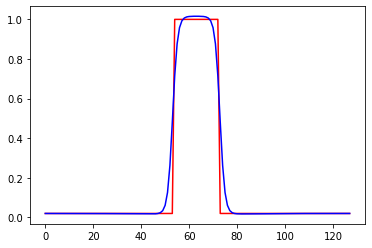

In [2]:
# defining parameters 

Nx = 128 # no. of grid points in x axis
Ny = 128 # no. of grid points in y axis

dt = 0.5 # time step

halfNx = Nx/2
halfNy = Ny/2

delkx = 2 * np.pi / Nx # FS variable in x axis
delky = 2 * np.pi / Ny # FS variable in y axis

R = 10.0 # radius of the circular precipitate embedded
R2 = R**2

c = np.zeros((Nx,Ny)) # concentration vector
# --- intial profile --- #
# circular ppt embedded in a matrix which has small amount of super saturation 
# ---------------------- #
for i in range (0,Nx) :
    for j in range (0,Ny) :
        parameter = (i+1-halfNx)**2 + (j+1-halfNy)**2 
        if ( parameter <= R2) :
            c[i][j] = 1.0
        elif (parameter > R2) : 
            c[i][j] = 0.02 

# plotting the initial profile 
cprofile = c[:][int(halfNx)]           
plt.plot(cprofile, color = "red") 

A = 1.0
M = 1.0
kappa = 1.0
kx = 1.0
ky = 1.0
# defining Fourier Space reciprocal vectors in 2D
g = np.zeros((Nx,Ny))
ghat = np.zeros((Nx,Ny))
chat = np.zeros((Nx,Ny))

for m in range (0,10): # outer - time loop 
    
    for n in range (0,10): # inner - time loop
        
        for i in range (0,Nx):
            for j in range (0,Ny):
                # evolving the f0 derivative 
                g[i][j] = 2 * A * c[i][j] * (1 - c[i][j]) * (1 - 2*c[i][j])
        # taking fft
        ghat = np.fft.fft2(g)
        chat = np.fft.fft2(c)
        
        for i in range (0,Nx) :
            # implementing PBC for x axis
            if (i <= halfNx):
                kx = i * delkx
            if (i > halfNx):
                kx = (i-Nx) * delkx
                
            for j in range (0,Ny):
                # implementing PBC for y axis
                if (j <= halfNy):
                    ky = j * delky
                if (j > halfNy):
                    ky = (j-Ny) * delky
            
                k2 = kx ** 2 + ky ** 2
                k4 = k2 ** 2
                # evolving the Cahn-Hilliard eqn in reciprocal space
                chat[i][j] = (chat[i][j] - dt * k2 * M * ghat[i][j]) / (1 + 2 * M * kappa * k4 * dt)
        # taking inverse fourier transform 
        c = np.real(np.fft.ifft2(chat))
# plotting the final profile          
cprofile = c[:][int(halfNx)]   
plt.plot(cprofile, color = "blue")